In [9]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


## Variable exploration (part I)

Looking at the variables to understand the type of data I'm working with.

* V1 and V4-7 have a small number of integer values, and can probably be treated as categorical. A few to keep an eye on:
    * V5, level 4 is a bit rare
    * V6 is extremely uniform across the population
* V2 is normally distributed, V3 is uniformly distributed

In [41]:
for var in ['Promotion', 'V1', 'V4', 'V5', 'V6', 'V7']:
    print(train_data.groupby(var).ID.count())

Promotion
No     42170
Yes    42364
Name: ID, dtype: int64
V1
0    10625
1    31631
2    31608
3    10670
Name: ID, dtype: int64
V4
1    27084
2    57450
Name: ID, dtype: int64
V5
1    15412
2    31196
3    32743
4     5183
Name: ID, dtype: int64
V6
1    21026
2    21146
3    21186
4    21176
Name: ID, dtype: int64
V7
1    25217
2    59317
Name: ID, dtype: int64


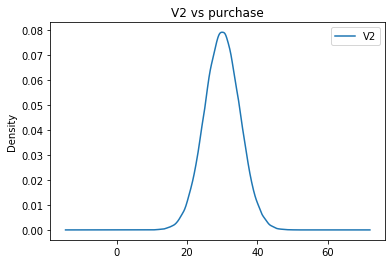

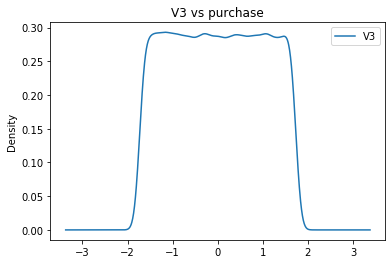

,V2,V3
count,84534.000000,84534.000000
mean,29.973600,0.000190
std,5.010626,1.000485
min,7.104007,-1.684550
25%,26.591501,-0.905350
50%,29.979744,-0.039572
75%,33.344593,0.826206
max,50.375913,1.691984


In [42]:
train_data.V2.plot(kind='density', legend=True)
plt.show()
train_data.V3.plot(kind='density', legend=True)
plt.show()
train_data.loc[:, ['V2', 'V3']].describe()